# Module 3 - Classification: Customer Churn Prediction

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [702]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [703]:
!wget $data -O churn-users.csv

--2025-10-13 22:25:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘churn-users.csv’

churn-users.csv     100%[===================>] 954.59K  --.-KB/s    in 0.09s   

2025-10-13 22:25:44 (10.7 MB/s) - ‘churn-users.csv’ saved [977501/977501]



In [704]:
df = pd.read_csv('churn-users.csv')

In [705]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [706]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [708]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [709]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [710]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [711]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [712]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [713]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [714]:
df.totalcharges = df.totalcharges.fillna(0)

In [715]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [716]:
df.churn == 'yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [717]:
df.churn = (df.churn == 'yes').astype(int)

In [718]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## Setup Validation Framework

In [719]:
from sklearn.model_selection import train_test_split

train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [720]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [721]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [722]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory Data Analysis

In [723]:
df_full_train = df_full_train.reset_index(drop=True)

In [724]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [725]:
df_full_train.churn.value_counts()

# The dataset is imbalanced

churn
0    4113
1    1521
Name: count, dtype: int64

In [726]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [727]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [728]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [729]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [730]:
df_full_train.columns


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [731]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [732]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance

In [733]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [734]:
df_full_train[df_full_train['gender'] == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [735]:
df_full_train[df_full_train['gender'] == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [736]:
df_full_train[df_full_train['partner'] == 'yes'].churn.mean()

np.float64(0.20503330866025166)

In [737]:
df_full_train[df_full_train['partner'] == 'no'].churn.mean()

np.float64(0.3298090040927694)

In [738]:
# Differece: Global - Group
# Risk Ratio: Risk = Group/Global

In [739]:
from IPython.display import display

In [740]:
for c in categorical:
    print(c)
    df_group =  df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - df_full_train.churn.mean()
    df_group['risk_ratio'] = df_group['mean'] / df_full_train.churn.mean()
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [741]:
df_group

,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Variable Importance

In [742]:
# Mutual Information

from sklearn.metrics import mutual_info_score

In [743]:
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

In [744]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [745]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [746]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [747]:
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

In [748]:
mi
# Top ones are better indicators of churn

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Correlation

In [749]:
df_corr = df_full_train[numerical].apply(pd.to_numeric, errors='coerce').corrwith(df_full_train.churn)
df_corr

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197416
dtype: float64

In [750]:
df_full_train[df_full_train['tenure'] <= 2].churn.mean()

np.float64(0.5953420669577875)

In [751]:
df_full_train[(df_full_train['tenure'] > 2) & (df_full_train['tenure'] <= 12)].churn.mean()


np.float64(0.3994413407821229)

In [752]:
df_full_train[df_full_train['tenure'] > 12].churn.mean()

np.float64(0.17634908339788277)

In [753]:
df_full_train[df_full_train['monthlycharges'] < 20].churn.mean()

np.float64(0.08829568788501027)

In [754]:
df_full_train[(df_full_train['monthlycharges'] >= 20) & (df_full_train['monthlycharges'] <= 50)].churn.mean()

np.float64(0.18074074074074073)

In [755]:
df_full_train[df_full_train['monthlycharges'] > 50].churn.mean()

np.float64(0.32499341585462205)

## One-hot Encoding

In [756]:
# Encode categorical features into numerical features

In [757]:
from sklearn.feature_extraction import DictVectorizer

In [758]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## Logistic Regression

In [759]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [760]:
z = np.linspace(-10, 10, 101)

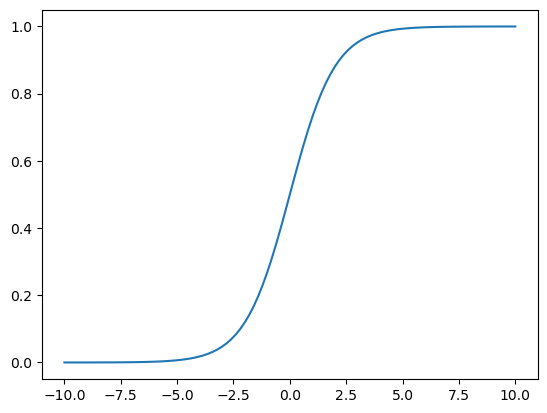

In [761]:
sigmoid(z)
plt.plot(z, sigmoid(z))
plt.show()


## Training Logisitc Regression with Scikit-Learn

In [762]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

In [763]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [764]:
model.coef_[0].round(3)


array([ 0.64 , -0.006, -0.684, ...,  0.306, -0.456, -0.419], shape=(4056,))

In [765]:
model.intercept_

array([-0.05036626])

In [766]:
model.predict(X_train)
# Hard prediction: churn or not

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [767]:
model.predict_proba(X_train)
# Soft prediction: probability of churn

array([[0.95837992, 0.04162008],
       [0.42209633, 0.57790367],
       [0.30200802, 0.69799198],
       ...,
       [0.37187249, 0.62812751],
       [0.96908839, 0.03091161],
       [0.25074873, 0.74925127]], shape=(4225, 2))

In [768]:
y_pred = model.predict_proba(X_val)[:, 1]

In [769]:
y_pred

array([0.00896955, 0.13358589, 0.1244942 , ..., 0.09542349, 0.81823206,
       0.83743343], shape=(1409,))

In [770]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [771]:
churn_decision = (y_pred >= 0.5).astype(int)

In [772]:
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

In [773]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [774]:
df_pred.head()

,probability,prediction,actual,correct
0,0.008970,0,0,True
1,0.133586,0,0,True
2,0.124494,0,0,True
3,0.560019,1,1,True
4,0.275446,0,0,True


In [775]:
df_pred.correct.mean()

np.float64(0.8026969481902059)

## Model Interpretation

In [776]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', ..., 'totalcharges=999.45',
       'totalcharges=999.9', 'totalcharges=_'],
      shape=(4056,), dtype=object)

In [777]:
model.coef_[0].round(3)

array([ 0.64 , -0.006, -0.684, ...,  0.306, -0.456, -0.419], shape=(4056,))

In [778]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


[('contract=month-to-month', np.float64(0.64)),
 ('contract=one_year', np.float64(-0.006)),
 ('contract=two_year', np.float64(-0.684)),
 ('dependents=no', np.float64(0.016)),
 ('dependents=yes', np.float64(-0.066)),
 ('deviceprotection=no', np.float64(0.075)),
 ('deviceprotection=no_internet_service', np.float64(-0.193)),
 ('deviceprotection=yes', np.float64(0.068)),
 ('gender=female', np.float64(-0.008)),
 ('gender=male', np.float64(-0.042)),
 ('internetservice=dsl', np.float64(-0.535)),
 ('internetservice=fiber_optic', np.float64(0.678)),
 ('internetservice=no', np.float64(-0.193)),
 ('monthlycharges', np.float64(-0.01)),
 ('multiplelines=no', np.float64(-0.232)),
 ('multiplelines=no_phone_service', np.float64(0.021)),
 ('multiplelines=yes', np.float64(0.16)),
 ('onlinebackup=no', np.float64(0.067)),
 ('onlinebackup=no_internet_service', np.float64(-0.193)),
 ('onlinebackup=yes', np.float64(0.076)),
 ('onlinesecurity=no', np.float64(0.241)),
 ('onlinesecurity=no_internet_service', np

In [779]:
small = ['contract', 'tenure', 'monthlycharges']

In [780]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [781]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [782]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [783]:
X_train_small = dv_small.transform(dicts_train_small)

In [784]:
model_small = LogisticRegression(solver='liblinear')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [785]:
model_small.coef_[0].round(3)

array([ 0.347, -0.641, -1.54 ,  0.027, -0.036])

In [786]:
model_small.intercept_

array([-1.83424534])

In [787]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.347),
 'contract=one_year': np.float64(-0.641),
 'contract=two_year': np.float64(-1.54),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [788]:
sigmoid(0.347 + 0 + (0) * 0.027 + 5 * (-0.036))

np.float64(0.5416532393676042)

## Using the Model

In [789]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [790]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': '258.35'},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'ten

In [791]:
dv = DictVectorizer(sparse=False)

In [792]:
X_full_train = dv.fit_transform(dicts_full_train)

In [793]:
model = LogisticRegression(solver='liblinear')

In [794]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [795]:
y_full_train = df_full_train.churn.values

In [796]:
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [797]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred
y_pred >= 0.5
churn_decision = (y_pred >= 0.5).astype(int)
(y_test == churn_decision).mean()
# Accuracy: 0.813

np.float64(0.8133427963094393)

In [799]:
customer = dicts_test[10]

In [802]:
model.predict_proba(dv.transform([customer]))[:, 1]
# 0.98
# 0.98 > 0.5, so the model predicts that this customer will churn
# This is a false positive
# False Positive Rate: 1 - True Positive Rate
# False Positive Rate: 1 - 0.98 = 0.02


array([0.49925374])

In [803]:
y_test[10]



np.int64(0)